In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import trange

# References:
# Reinforcement Learning: An Introduction
# https://github.com/habanoz/reinforcement-learning-an-introduction
# https://github.com/LyWangPX/Reinforcement-Learning-2nd-Edition-by-Sutton-Exercise-Solutions/tree/master

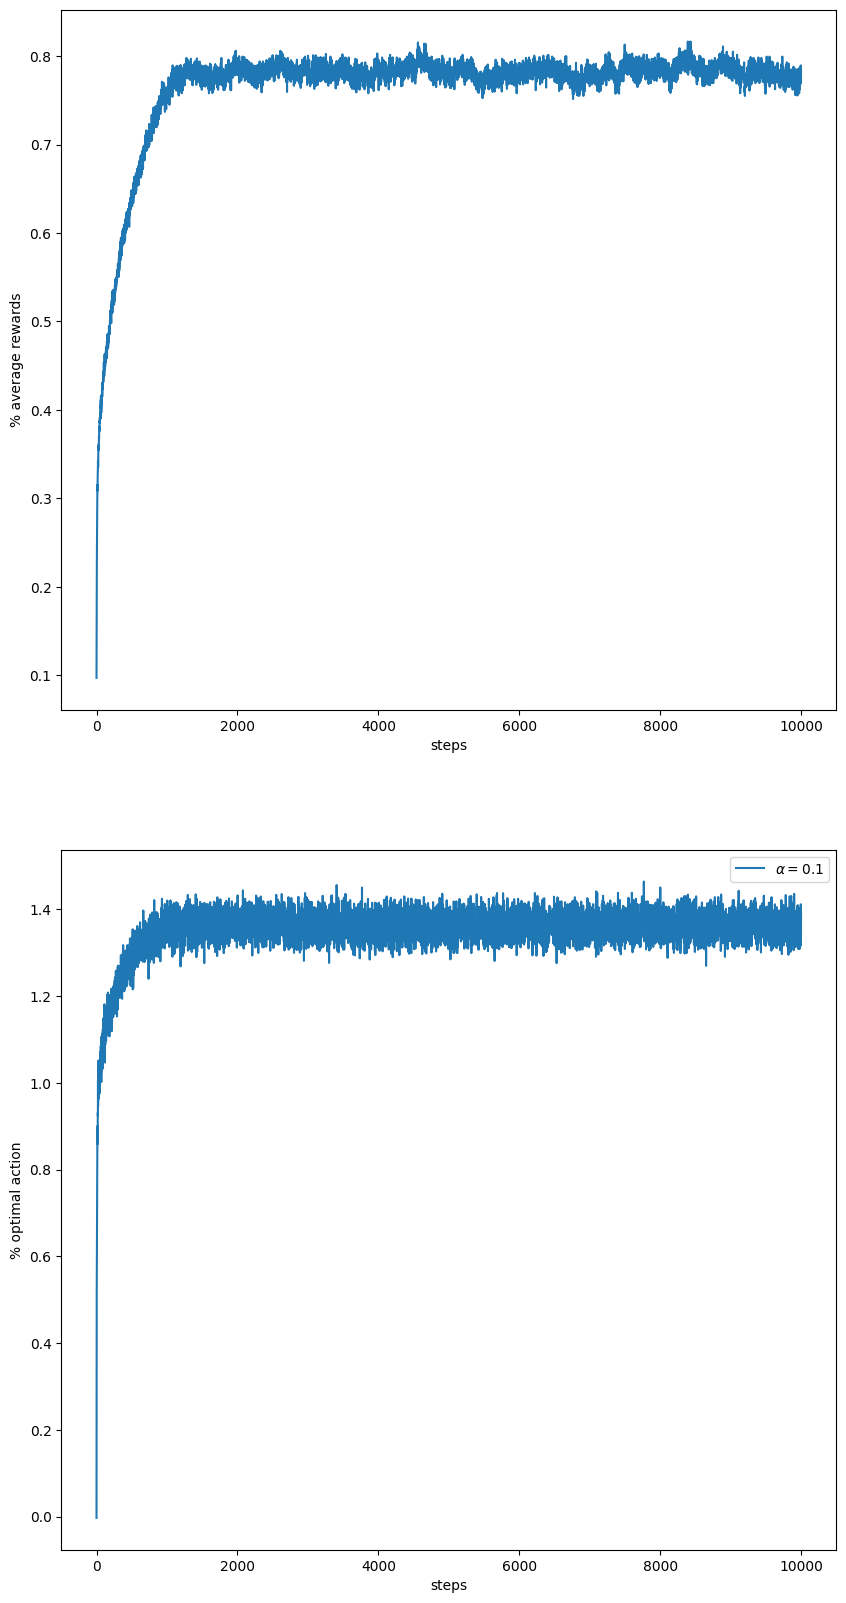

In [29]:
num_bandits = 10
num_runs = 2000
num_iterations = 10000
epsilon = 0.1
step_size = 0.1
choices = np.arange(num_bandits)
rewards_collected = np.zeros((num_runs, num_iterations))
best_action_counts = np.zeros(rewards_collected.shape)
for i in range(num_runs):
    initial_weight = 0
    true_reward = 0
    estimates = np.zeros(num_bandits) + initial_weight
    rewards = np.random.randn(num_bandits) + true_reward
    for j in range(num_iterations):
        if np.random.rand() < epsilon:
            chosen_action = np.random.choice(choices)
        else:
            best_estimation = np.max(estimates)
            chosen_action = np.random.choice(np.where(estimates == best_estimation)[0])
        #print(chosen_action, best_estimation)
        # Get the reward
        reward = np.random.randn() + rewards[chosen_action]
        # update the estimates for next iteration
        estimates[chosen_action] += step_size * (reward - estimates[chosen_action])
        rewards_collected[i, j] = reward
        best_action = np.argmax(rewards)
        if chosen_action == best_action:
            best_action_counts[i, j] = 1

mean_best_actions = best_action_counts.mean(axis=0)
mean_rewards = rewards_collected.mean(axis=0)

plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
plt.plot(mean_best_actions, label=f"$\\alpha = {epsilon}$")
plt.xlabel('steps')
plt.ylabel('% average rewards')

plt.subplot(2, 1, 2)
plt.plot(mean_rewards, label=f"$\\alpha = {epsilon}$")
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()